In [46]:
import glob
import torch
import os
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.transforms as transforms
from matplotlib.patches import Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
import matplotlib.ticker as mticker
from sklearn.mixture import GaussianMixture
from copy import copy
import pandas as pd
from ast import literal_eval

from src.utils.pickle_handler import *
from src.models.mixtures.squared_nm_gaussian_mixture import NMSquaredGaussianMixture

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [51]:
df_results = pd.read_csv("cosine-results-plot.csv")
print(df_results.head(1))
train_batch_loss = df_results["warm-oath-2638 - train.loss_batch"]
val_batch_loss = df_results["warm-oath-2638 - validation.loss_batch"]

train_batch_loss = [literal_eval(el) for el in train_batch_loss]
val_batch_loss = [literal_eval(el) for el in val_batch_loss]

   train.it  warm-oath-2638 - _step  warm-oath-2638 - _step__MIN  \
0         0                      74                           74   

   warm-oath-2638 - _step__MAX  warm-oath-2638 - train.loss  \
0                           74                     5.753001   

   warm-oath-2638 - train.loss__MIN  warm-oath-2638 - train.loss__MAX  \
0                          5.753001                          5.753001   

                   warm-oath-2638 - train.loss_batch  \
0  [9.4377724581988,6.898614870473372,6.788689658...   

   warm-oath-2638 - validation.loss  warm-oath-2638 - validation.loss__MIN  \
0                          4.603692                               4.603692   

   warm-oath-2638 - validation.loss__MAX  \
0                               4.603692   

              warm-oath-2638 - validation.loss_batch  
0  [4.6212158686993465,4.599923636436487,4.492120...  


In [44]:
components = 3
dataset = 'ring'

# Load dataset
train_set = load_object('data/train', dataset)
val_set = load_object('data/val', dataset)

tensor_train_set = torch.from_numpy(train_set) if str(device) == 'cpu' else torch.from_numpy(train_set).cuda()
tensor_val_set = torch.from_numpy(val_set) if str(device) == 'cpu' else torch.from_numpy(val_set).cuda()

In [45]:
# Train and fit baseline
if components == 2:
    gmm_com = 3
if components == 3:
    gmm_com = 7


# Create an instance of the GaussianMixture class
n_components = gmm_com # number of Gaussian components
gmm = GaussianMixture(
    n_components=n_components,
    covariance_type='full',
    init_params='random_from_data'
)

gmm = gmm.fit(train_set)
    
# Print the negative log likelihood for each iteration step

print(-gmm.score(train_set))
print(-gmm.score(val_set))

3.6618519093302666
3.644160165137654


In [103]:
# Load models
path_it0 = f'out/saved_models/checkpoint0_nm_{dataset}'
path_final = f'out/saved_models/checkpoint49_nm_{dataset}'

model_it0 = NMSquaredGaussianMixture(2, components)
model_it0.load_state_dict(state_dict=torch.load(path_it0))

model_final = NMSquaredGaussianMixture(2, components)
model_final.load_state_dict(state_dict=torch.load(path_final))

model_it0.neglog_likelihood(tensor_train_set)
model_final.neglog_likelihood(tensor_train_set)

tensor(-0.0004, dtype=torch.float64, grad_fn=<NegBackward0>)

In [85]:
model_it0.tb_params

{'means': tensor([[ 3.5001e+00,  4.0000e+00],
         [ 5.9483e+00, -2.8352e-04],
         [ 3.1390e+00,  3.8266e+00],
         [ 5.9483e+00, -2.8352e-04],
         [ 3.5001e+00, -3.9999e+00],
         [ 3.1391e+00, -3.8266e+00],
         [ 3.1390e+00,  3.8266e+00],
         [ 3.1391e+00, -3.8266e+00],
         [-9.8913e-01,  8.3349e-05]], dtype=torch.float64,
        grad_fn=<StackBackward0>),
 'sigmas': tensor([[[ 2.0124e+00, -1.0029e+00],
          [-1.0029e+00,  1.6386e+00]],
 
         [[ 1.3984e+00,  7.3341e-05],
          [ 7.3341e-05,  1.1387e+00]],
 
         [[ 3.3542e+00, -1.5303e+00],
          [-1.5303e+00,  2.7833e+00]],
 
         [[ 1.3984e+00,  7.3341e-05],
          [ 7.3341e-05,  1.1387e+00]],
 
         [[ 2.0121e+00,  1.0028e+00],
          [ 1.0028e+00,  1.6383e+00]],
 
         [[ 3.3537e+00,  1.5301e+00],
          [ 1.5301e+00,  2.7828e+00]],
 
         [[ 3.3542e+00, -1.5303e+00],
          [-1.5303e+00,  2.7833e+00]],
 
         [[ 3.3537e+00,  1.5301e+00],


In [95]:
# Load train and val loss data
train_loss_vis = load_object(f'out/models/nm_{dataset}', 'train_loss_vis')
val_loss_vis = load_object(f'out/models/nm_{dataset}', 'val_loss_vis')
train_loss_vis

[[tensor(0.2255, dtype=torch.float64, requires_grad=True),
  tensor(0.2432, dtype=torch.float64, requires_grad=True),
  tensor(0.2333, dtype=torch.float64, requires_grad=True),
  tensor(0.2454, dtype=torch.float64, requires_grad=True),
  tensor(0.2449, dtype=torch.float64, requires_grad=True),
  tensor(0.2232, dtype=torch.float64, requires_grad=True),
  tensor(0.2150, dtype=torch.float64, requires_grad=True),
  tensor(0.2336, dtype=torch.float64, requires_grad=True),
  tensor(0.2191, dtype=torch.float64, requires_grad=True),
  tensor(0.2071, dtype=torch.float64, requires_grad=True),
  tensor(0.2281, dtype=torch.float64, requires_grad=True),
  tensor(0.2312, dtype=torch.float64, requires_grad=True),
  tensor(0.2060, dtype=torch.float64, requires_grad=True),
  tensor(0.2156, dtype=torch.float64, requires_grad=True),
  tensor(0.2313, dtype=torch.float64, requires_grad=True),
  tensor(0.2054, dtype=torch.float64, requires_grad=True),
  tensor(0.2085, dtype=torch.float64, requires_grad=True

In [60]:
val_loss_vis

[[tensor(0.1436, dtype=torch.float64),
  tensor(0.1505, dtype=torch.float64),
  tensor(0.1479, dtype=torch.float64),
  tensor(0.1431, dtype=torch.float64),
  tensor(0.1401, dtype=torch.float64),
  tensor(0.1421, dtype=torch.float64),
  tensor(0.1382, dtype=torch.float64),
  tensor(0.1408, dtype=torch.float64),
  tensor(0.1565, dtype=torch.float64),
  tensor(0.1398, dtype=torch.float64),
  tensor(0.1354, dtype=torch.float64),
  tensor(0.1371, dtype=torch.float64),
  tensor(0.1419, dtype=torch.float64),
  tensor(0.1432, dtype=torch.float64),
  tensor(0.1450, dtype=torch.float64),
  tensor(0.1394, dtype=torch.float64),
  tensor(0.1470, dtype=torch.float64),
  tensor(0.1426, dtype=torch.float64),
  tensor(0.1396, dtype=torch.float64),
  tensor(0.1410, dtype=torch.float64),
  tensor(0.1406, dtype=torch.float64),
  tensor(0.1394, dtype=torch.float64),
  tensor(0.1464, dtype=torch.float64),
  tensor(0.1454, dtype=torch.float64),
  tensor(0.1399, dtype=torch.float64),
  tensor(0.1556, dtype=to

In [20]:
def _confidence_ellipse(ax, sigma, mu, n_std=2.3, facecolor='none', **kwargs):
        pearson = sigma[0][1]/np.sqrt(sigma[0][0] * sigma[1][1])
        # Using a special case to obtain the eigenvalues of this
        # two-dimensionl dataset.
        ell_radius_x = np.sqrt(1 + pearson)
        ell_radius_y = np.sqrt(1 - pearson)
        ellipse = Ellipse((0, 0),
            width=ell_radius_x * 2,
            height=ell_radius_y * 2,
            facecolor=facecolor,
            **kwargs)

        # Calculating the stdandard deviation of x from
        # the squareroot of the variance and multiplying
        # with the given number of standard deviations.
        scale_x = np.sqrt(sigma[0][0]) * n_std
        mean_x = mu[0]

        # calculating the stdandard deviation of y ...
        scale_y = np.sqrt(sigma[1][1]) * n_std
        mean_y = mu[1]

        transf = transforms.Affine2D() \
            .rotate_deg(45) \
            .scale(scale_x, scale_y) \
            .translate(mean_x, mean_y)

        ellipse.set_transform(transf + ax.transData)
        return ax.add_patch(ellipse)

def get_grid(r, i, j, cond):
        grid = np.meshgrid(r,r)

        grid = np.stack(grid,2)
        grid = grid.reshape(-1,2)
        
        num_point = len(grid)
        grid_cond = np.tile(cond[None,:], [num_point, 1])
        
        grid_cond[:,i] = grid[:,0]
        grid_cond[:,j] = grid[:,1]

        return grid_cond

def plot_heatmap(model, ax, fig):
    idx_i, idx_j = 0,1

    ngrid = 100
    eval_grid = np.linspace(-8,8,ngrid)

    cond_values = np.zeros(2)
    epsilon = 1.5

    eval_points = get_grid(eval_grid, idx_i, idx_j, cond_values)


    logpdf = model.pdf(torch.from_numpy(eval_points)).data.cpu().numpy()
    
    ax.set_xlim([-8, 8])
    ax.set_ylim([-8, 8])
    
    asp = np.diff(ax.get_xlim())[0] / np.diff(ax.get_ylim())[0]
    ax.set_aspect(asp)

    c = ax.pcolor(eval_grid, eval_grid, logpdf.reshape(ngrid, ngrid), vmin=0)
    #ax.scatter(train_samples[:,idx_i].data.cpu().numpy(), train_samples[:,idx_j].data.cpu().numpy(), 1, color="r", alpha=0.5)
    #ax.scatter(val_samples[:,idx_i].data.cpu().numpy(), val_samples[:,idx_j].data.cpu().numpy(), 1, color="k", alpha=0.5)


    fig.colorbar(c, ax=ax)
    

def plot_baseline_heatmap(model, ax, fig):
    idx_i, idx_j = 0,1

    ngrid = 100
    eval_grid = np.linspace(-8,8,ngrid)

    cond_values = np.zeros(2)
    epsilon = 1.5
    
    eval_points = get_grid(eval_grid, idx_i, idx_j, cond_values)
    logpdf = []
    
    for point in eval_points:
        logpdf.append(model.score([point]))
    
    logpdf = np.exp(np.array(logpdf))
    
    ax.set_xlim([-8, 8])
    ax.set_ylim([-8, 8])
    
    asp = np.diff(ax.get_xlim())[0] / np.diff(ax.get_ylim())[0]
    ax.set_aspect(asp)

    c = ax.pcolor(eval_grid, eval_grid, logpdf.reshape(ngrid, ngrid), vmin=0)
    
    fig.colorbar(c, ax=ax)
    
    
def plot_contours(model, ax):
    samples = tensor_train_set

    x, y = samples[:,0], samples[:,1]

    ax.axvline(c='grey', lw=1, alpha=.5)
    ax.axhline(c='grey', lw=1, alpha=.5)
    
    ax.set_xlim([-8, 8])
    ax.set_ylim([-8, 8])
    
    asp = np.diff(ax.get_xlim())[0] / np.diff(ax.get_ylim())[0]
    ax.set_aspect(asp)
    
    ax.scatter(x, y, s=0.5)

    for i in range(len(model.tb_params['means'])):
        sigma = model.tb_params['sigmas'][i].data.cpu().numpy()
        mu = model.tb_params['means'][i].data.cpu().numpy()

        colour = 'blue' if model.tb_params['weights'][i] > 0 else 'red'
        config = {
            'edgecolor': colour,
            'facecolor': colour,
            'alpha': .1
        }

        _confidence_ellipse(ax, sigma, mu, **config)
        ax.scatter(mu[0], mu[1], c='red', s=3)

def plot_baseline_contours(model, ax):
    samples = tensor_train_set

    x, y = samples[:,0], samples[:,1]

    ax.axvline(c='grey', lw=1, alpha=.5)
    ax.axhline(c='grey', lw=1, alpha=.5)
    
    ax.set_xlim([-8, 8])
    ax.set_ylim([-8, 8])
    
    asp = np.diff(ax.get_xlim())[0] / np.diff(ax.get_ylim())[0]
    ax.set_aspect(asp)
    
    ax.scatter(x, y, s=0.5)

    for i in range(len(model.means_)):
        #sigma = np.diag(model.covariances_[i])
        sigma = model.covariances_[i]
        mu = model.means_[i]

        config = {
            'edgecolor': 'blue',
            'facecolor': 'blue',
            'alpha': .1
        }

        _confidence_ellipse(ax, sigma, mu, **config)
        ax.scatter(mu[0], mu[1], c='red', s=3)

def plot_loss_curves(ax):
    train_vis = []
    val_vis = []
    
    for batch in train_loss_vis:
        batch = torch.tensor(batch).detach().numpy()
        
        train_vis.append([
            batch.min(),
            batch.max(),
            batch.mean()
        ])
    
    for batch in val_loss_vis:
        batch = torch.tensor(batch).detach().numpy()
        
        val_vis.append([
            batch.min(),
            batch.max(),
            batch.mean()
        ])
    
    train_vis = np.array(train_vis)
    val_vis = np.array(val_vis)
    
    ax.plot(list(range(1, 21)), train_vis[:,2], c='blue', label='train loss')
    ax.plot(list(range(1, 21)), val_vis[:,2], c='brown', label='val loss', linestyle='--')
    
    ax.ticklabel_format(useOffset=False)
    ax.legend()
    ax.grid()

def plot_baseline_loss_curves(ax):
    train_vis = []
    val_vis = []
    
    ax.plot(list(range(1, 21)), baseline_train_loss, c='blue', label='train loss')
    ax.plot(list(range(1, 21)), baseline_val_loss, c='brown', label='val loss', linestyle='--')
    
    ax.ticklabel_format(useOffset=False)
    ax.legend()
    ax.grid()

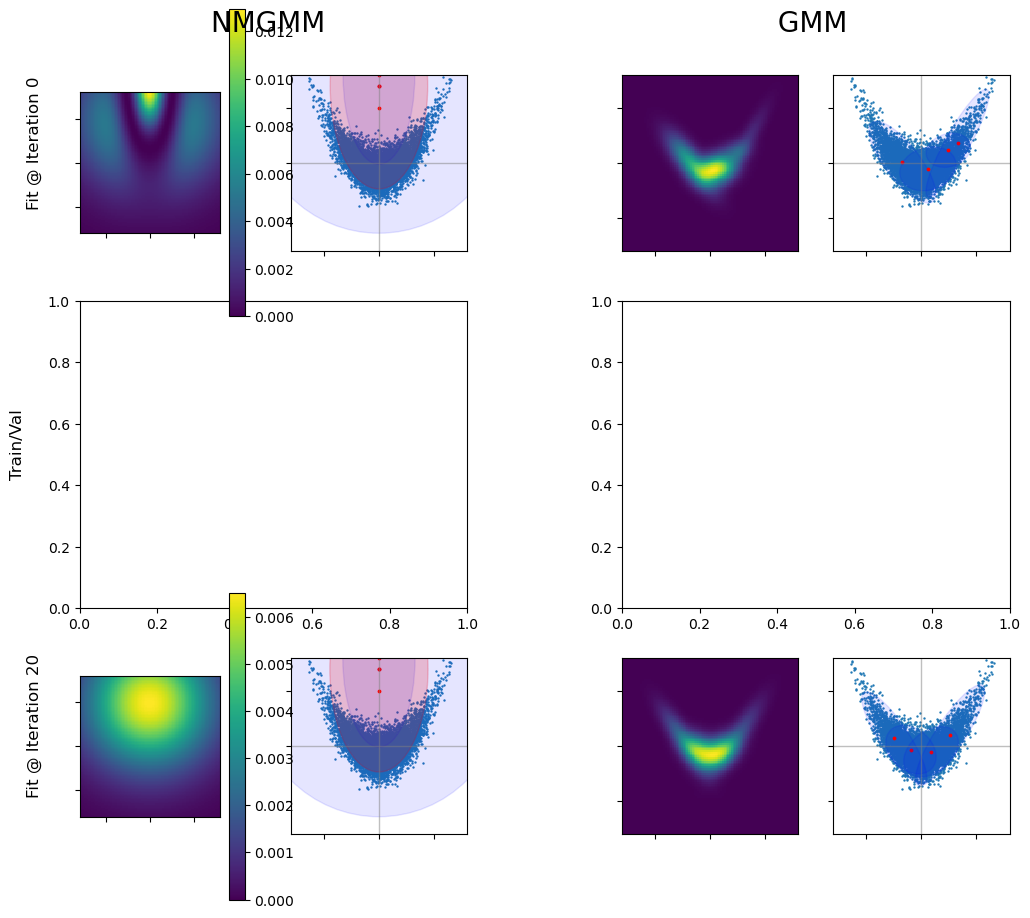

In [104]:
fig = plt.figure(figsize=(12, 10))

fig.suptitle('NMGMM                                                   GMM', y=1, fontsize=20)

gs = fig.add_gridspec(1,2,width_ratios = [6, 6], 
          height_ratios = [12], wspace=0.4)


gs0 = gs[0, 0].subgridspec(3, 2, wspace=0.2, hspace=-0.05)
gs1 = gs[0, 1].subgridspec(3, 2, wspace=0.2, hspace=-0.05)


# NMGMM Axes

ax1 = fig.add_subplot(gs0[0, 0])
ax1.set_title('Fit @ Iteration 0', color='k', rotation='vertical',x=-0.32,y=0.13)

ax2 = fig.add_subplot(gs0[0, 1], sharey=ax1, sharex=ax1)
ax1.yaxis.set_major_formatter(mticker.NullFormatter())
ax1.xaxis.set_major_formatter(mticker.NullFormatter())

ax3 = fig.add_subplot(gs0[1, :])
ax3.set_title('Train/Val', color='k', rotation='vertical',x=-0.16,y=0.40)

ax4 = fig.add_subplot(gs0[2, 0])
ax4.set_title('Fit @ Iteration 20', color='k', rotation='vertical',x=-0.32,y=0.10)

ax5 = fig.add_subplot(gs0[2, 1], sharey=ax4, sharex=ax4)
ax4.yaxis.set_major_formatter(mticker.NullFormatter())
ax4.xaxis.set_major_formatter(mticker.NullFormatter())


# GMM Axes

ax6 = fig.add_subplot(gs1[0, 0], sharey=ax1, sharex=ax1)
ax7 = fig.add_subplot(gs1[0, 1], sharey=ax1, sharex=ax1)

ax8 = fig.add_subplot(gs1[1, :])

ax9 = fig.add_subplot(gs1[2, 0], sharey=ax1, sharex=ax1)
ax10 = fig.add_subplot(gs1[2, 1], sharey=ax1, sharex=ax1)

# NMGMM Plots

plot_heatmap(model_it0, ax1, fig)
plot_contours(model_it0, ax2)

#plot_loss_curves(ax3)

plot_heatmap(model_final, ax4, fig)
plot_contours(model_final, ax5)

# Baseline plots

plot_baseline_heatmap(gmm_0, ax6, fig)
plot_baseline_contours(gmm_0, ax7)

#plot_baseline_loss_curves(ax8)

plot_baseline_heatmap(gmm, ax9, fig)
plot_baseline_contours(gmm, ax10)

plt.subplots_adjust(top=1)
fig.savefig('banana_nmgmm_results.pdf', format='pdf', dpi=1200)

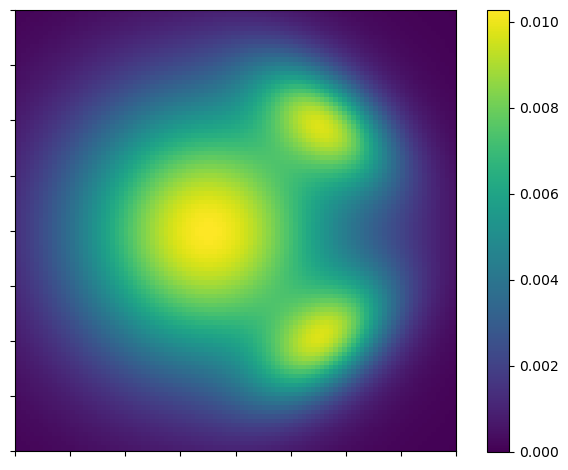

In [88]:
fig, ax = plt.subplots(1, 1)
ax.yaxis.set_major_formatter(mticker.NullFormatter())
ax.xaxis.set_major_formatter(mticker.NullFormatter())
ax.set_aspect('equal', adjustable='box')

plot_heatmap(model_it0, ax, fig)
fig.tight_layout()
fig.savefig(f'model_start_heatmap_{dataset}.pdf', format='png', dpi=1200)

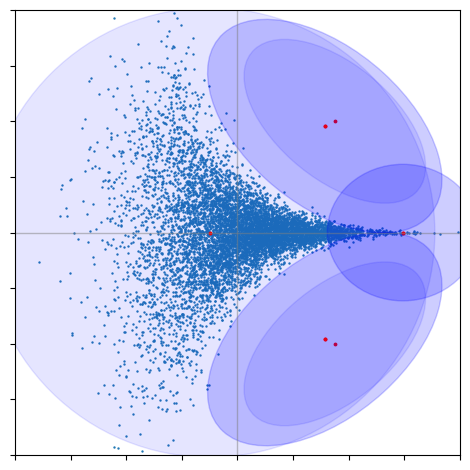

In [89]:
fig, ax = plt.subplots(1, 1)
ax.yaxis.set_major_formatter(mticker.NullFormatter())
ax.xaxis.set_major_formatter(mticker.NullFormatter())
ax.set_aspect('equal', adjustable='box')

plot_contours(model_it0, ax)
fig.tight_layout()
fig.savefig(f'model_start_contour_{dataset}.pdf', format='png', dpi=1200)

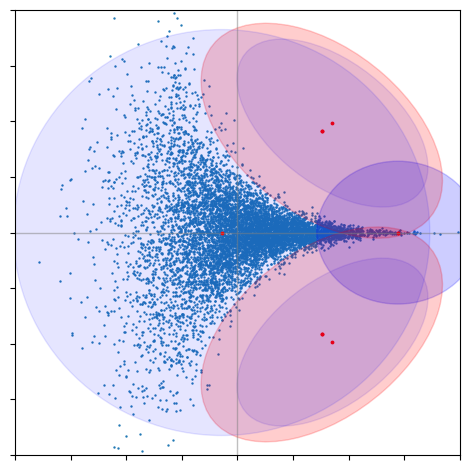

In [90]:
fig, ax = plt.subplots(1, 1)
ax.yaxis.set_major_formatter(mticker.NullFormatter())
ax.xaxis.set_major_formatter(mticker.NullFormatter())
ax.set_aspect('equal', adjustable='box')

plot_contours(model_it19, ax)
fig.tight_layout()
fig.savefig(f'model_final_contour_{dataset}.pdf', format='png', dpi=1200)

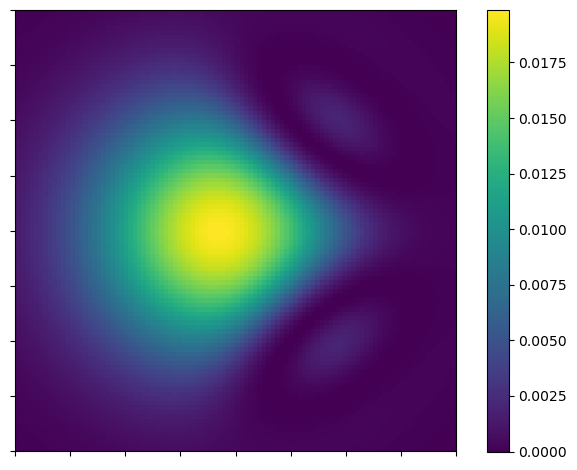

In [91]:
fig, ax = plt.subplots(1, 1)
ax.yaxis.set_major_formatter(mticker.NullFormatter())
ax.xaxis.set_major_formatter(mticker.NullFormatter())
ax.set_aspect('equal', adjustable='box')

plot_heatmap(model_it19, ax, fig)
fig.tight_layout()
fig.savefig(f'model_final_heatmap_{dataset}.pdf', format='png', dpi=1200)

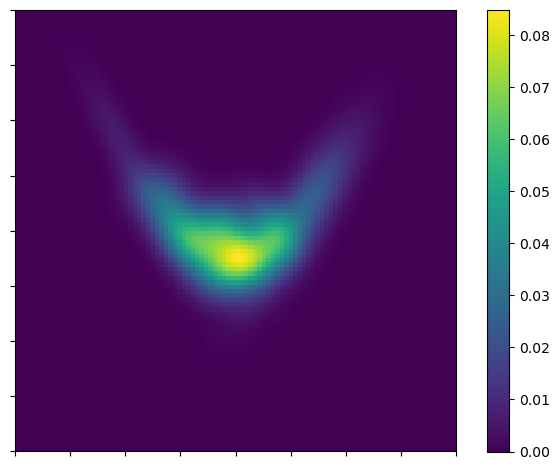

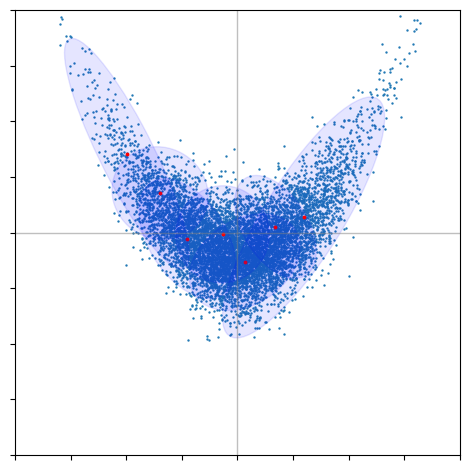

In [31]:
fig, ax = plt.subplots(1, 1)
ax.yaxis.set_major_formatter(mticker.NullFormatter())
ax.xaxis.set_major_formatter(mticker.NullFormatter())

plot_baseline_heatmap(gmm, ax, fig)
fig.tight_layout()
fig.savefig(f'model_base_heatmap_{dataset}.png', format='png')

fig, ax = plt.subplots(1, 1)
ax.yaxis.set_major_formatter(mticker.NullFormatter())
ax.xaxis.set_major_formatter(mticker.NullFormatter())

plot_baseline_contours(gmm, ax)
fig.tight_layout()
fig.savefig(f'model_base_contours_{dataset}.png', format='png')

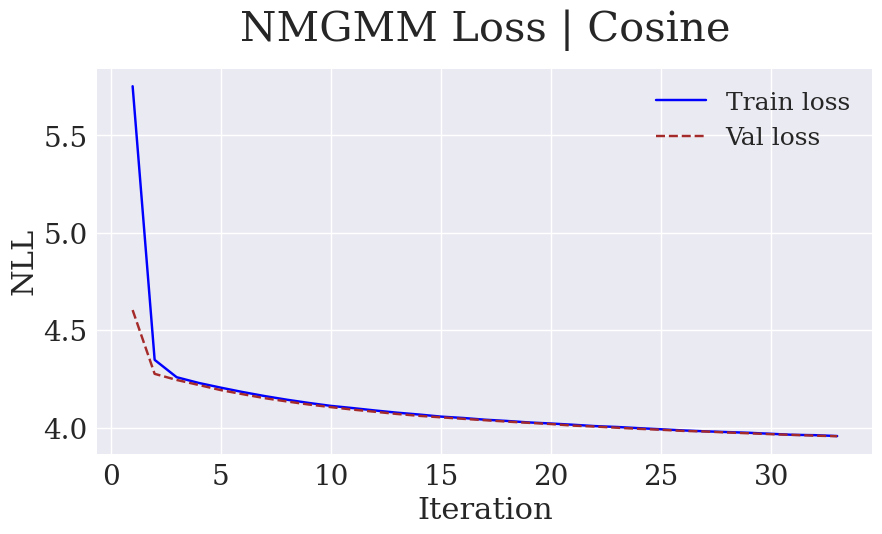

In [52]:
plt.style.use('seaborn')


tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": False,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 22,
    "font.size": 22,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 18,
    "xtick.labelsize": 20,
    "ytick.labelsize": 20,
    "legend.fontsize": 18
}

plt.rcParams.update(tex_fonts)

def plot_loss_curves(ax):
    train_vis = []
    val_vis = []
    
    for batch in train_batch_loss:
        batch = np.array(batch)
        
        train_vis.append([
            batch.min(),
            batch.max(),
            batch.mean()
        ])
    
    for batch in val_batch_loss:
        batch = np.array(batch)
        
        val_vis.append([
            batch.min(),
            batch.max(),
            batch.mean()
        ])
    
    train_vis = np.array(train_vis)
    val_vis = np.array(val_vis)
    
    ax.plot(list(range(1, len(val_vis)+1)), train_vis[:,2], c='blue', label='Train loss')
    ax.plot(list(range(1, len(val_vis)+1)), val_vis[:,2], c='brown', label='Val loss', linestyle='--')
    
    ax.ticklabel_format(useOffset=False)
    ax.legend()


fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_title("NMGMM Loss | Cosine", fontsize=30, pad=20)
ax.set_xlabel("Iteration")
ax.set_ylabel("NLL")
plot_loss_curves(ax)
fig.savefig(f'model_loss_curve_cosine.pdf', format='pdf', bbox_inches='tight')